# A2 Predicting Car Price

In this assignment, We need to predict the **selling price for a car** . Finally we also need to prepare a simple web-based car selling price prediction system for deployment.

## The provide raw data contains following features- 

- **name** : Brand name of the Car
- **Year** : Year of the car made
- **selling_price**: Selling price of the car
- **km_driven**: How many Killometers A car already run
- **fuel**: Type of fuel is used in car
- **seller_type**: Type of seller (Invididual, Dealer etc)
- **transmission**: Type of transmission of car ( Manual, Automatic)
- **owner**: How many owner already did purchase of a car
- **mileage**: Mileage of the car
- **engine**: Engine size
- **max_power**: The max power is available to a car
- **torque**:if an engine has a lot of torque, the car can accelerate more quickly.
- **seats**: Number of seats are availabe to a car

This raw dataset is required to be processed on given preporessing conditions


## Importing libraries

In [924]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [925]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.3')

## 1. Load data

In [926]:
# Read the CSV file 'Cars - Cars.csv' and store it in a data frame called 'df'
df = pd.read_csv('data/Cars.csv')

In [927]:
# Display the first few rows of the DataFrame 'df' to get a quick overview of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [928]:
# Get the dimensions of the DataFrame 'df' using the shape attribute
df.shape

(8128, 13)

In [929]:
# Generate descriptive statistics of the DataFrame 'df' using the describe() function
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [930]:
# Display information about the DataFrame 'df', including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [931]:
# Create a mapping of unique owner categories to numerical values
category_mapping_owener = {category: index + 1 for index, category in enumerate(df['owner'].unique())}
# Apply the mapping to the 'owner' column and update it with encoded values
df['owner'] = df['owner'].map(category_mapping_owener)
print(category_mapping_owener)
df.head()

{'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [932]:
#lambda function in somewhere later we need to check the owner category original value
get_key_by_value = lambda value: next((key for key, val in category_mapping_owener.items() if val == value), None)

In [933]:
# Drop rows where 'fuel' column contains 'CNG' or 'LPG'
df = df.drop(df[df['fuel'].isin(['CNG', 'LPG'])].index)


In [934]:
#For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float)
#Hint: usedf.mileage.str.split
# Split the 'Mileage' string and convert the numeric part to float
df['mileage'] = df['mileage'].str.split().str[0].astype(float)
# Display the first few rows of the 'mileage' column in the DataFrame 'df' after modification
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [935]:
#For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)
df['engine'] = df['engine'].str.split().str[0].astype(float)

In [936]:
#For the feature max_power, remove Text part and convert the column to numerical type (e.g., float)
df['max_power'] = df['max_power'].str.split().str[0].astype(float)

In [937]:
# Rename the 'name' column to 'brand'
df = df.rename(columns={'name':'brand'})

# Extract the first word from the 'brand' column for each row
df['brand'] = df['brand'].str.split().str[0]
# The 'brand' column now contains only the first word of each brand name

In [938]:
#Drop the feature torque,
df.drop('torque', axis=1,inplace=True)

In [939]:
# Drop rows where the 'owner' column contains the value 5 (Test Drive Car)
df = df.drop(df[df['owner'].isin([5])].index)

In [940]:
# Apply log transform to the 'selling_price' column
df['selling_price'] = np.log(df['selling_price']) 

In [941]:
# Display the first few rows of the DataFrame 'df'
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [942]:
#copy the df.copy to further data processing & feature transformation
df_cp = df.copy()

In [943]:
df_cp.selling_price.describe()

count    8028.000000
mean       12.979337
std         0.838039
min        10.308919
25%        12.468437
50%        13.017003
75%        13.429848
max        16.118096
Name: selling_price, dtype: float64

In [944]:
# Define the percentiles to create four classes
percentiles = [0, 0.25, 0.5, 0.75, 1]

# Calculate the corresponding cutoff values
cutoffs = df_cp['selling_price'].quantile(percentiles)

# Create labels for the four classes (0, 1, 2, 3)
labels = [0, 1, 2, 3]

# Use pd.cut to create the discrete variable
df_cp['price_category'] = pd.cut(df_cp['selling_price'], bins=cutoffs, labels=labels, include_lowest=True)

# Inspect the result
print(df_cp[['selling_price', 'price_category']])

      selling_price price_category
0         13.017003              1
1         12.821258              1
2         11.970350              0
3         12.323856              0
4         11.775290              0
...             ...            ...
8123      12.676076              1
8124      11.813030              0
8125      12.853176              1
8126      12.577636              1
8127      12.577636              1

[8028 rows x 2 columns]


In [945]:
df_cp.price_category.unique()

[1, 0, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

In [946]:
len(df_cp.price_category.unique())

4

In [947]:
df_cp.drop('brand', axis=1,inplace=True)

We're using the matplotlib and seaborn libraries to create subplots with countplots for other categorical column in the DataFrame df_cp. The loop iterates through the categorical columns, and for each column, a countplot is created. 

In [948]:
# List of categorical columns in the DataFrame other than 'brand'
categorical_cols = ['fuel','seller_type', 'transmission']

"Year" shows the car model year. We can replace this column with the cars age attribute.To calculate the age, we consider the origin time to be 1 year older than the maximum model year.

In [949]:
# Calculate and insert a new column 'age' based on the 'year' column
df_cp.insert(0, "age", df_cp["year"].max()+1-df_cp["year"])
# Drop the 'year' column from the DataFrame
df_cp.drop('year', axis=1, inplace=True)

In [950]:
# Define the numerical columns to visualize other than 'year'
numerical_cols = ['age', 'km_driven', 'owner','mileage','engine', 'seats','max_power', 'selling_price']

In [951]:
# List of categorical columns to be one-hot encoded
cat_cols = ['fuel', 'seller_type', 'transmission']
# Use pandas get_dummies to perform one-hot encoding on the specified categorical columns
# Drop_first=True is used to prevent multicollinearity by dropping the first category
df_cp = pd.get_dummies(df_cp, columns=cat_cols, drop_first=True)
# Display the first 5 rows of the modified DataFrame
df_cp.head(5)

,age,selling_price,km_driven,owner,mileage,engine,max_power,seats,price_category,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,7,13.017003,145500,1,23.40,1248.0,74.00,5.0,1,0,1,0,1
1,7,12.821258,120000,2,21.14,1498.0,103.52,5.0,1,0,1,0,1
2,15,11.970350,140000,3,17.70,1497.0,78.00,5.0,0,1,1,0,1
3,11,12.323856,127000,1,23.00,1396.0,90.00,5.0,0,0,1,0,1
4,14,11.775290,120000,1,16.10,1298.0,88.20,5.0,0,1,1,0,1


In [952]:
# Convert price_category into one-hot encoded features
df_encoded = pd.get_dummies(df_cp, columns=['price_category'], prefix='class')

In [953]:
df_encoded.head()

,age,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,class_0,class_1,class_2,class_3
0,7,13.017003,145500,1,23.40,1248.0,74.00,5.0,0,1,0,1,0,1,0,0
1,7,12.821258,120000,2,21.14,1498.0,103.52,5.0,0,1,0,1,0,1,0,0
2,15,11.970350,140000,3,17.70,1497.0,78.00,5.0,1,1,0,1,1,0,0,0
3,11,12.323856,127000,1,23.00,1396.0,90.00,5.0,0,1,0,1,1,0,0,0
4,14,11.775290,120000,1,16.10,1298.0,88.20,5.0,1,1,0,1,1,0,0,0


In [954]:
# Define the list of selected features for prediction
feature_list  = ['km_driven','age','engine','fuel_Petrol','transmission_Manual']

In [955]:
# # Create the feature matrix X by selecting the specified features
X = df_encoded[feature_list]
# # Create the target vector y using the 'selling_price' column
y = df_encoded[['class_0', 'class_1', 'class_2', 'class_3']]

In [956]:
X.shape, y.shape

((8028, 5), (8028, 4))

### Train test split

__using the train_test_split function from the sklearn.model_selection module to split your dataset into training and testing sets.__

In [957]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
# Set test_size to 0.3 for a 70-30 train-test split
# Use random_state for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [958]:
# Check the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5619, 5), (2409, 5), (5619, 4), (2409, 4))

In [959]:
print("Total Dataset Size", X.shape[0])
print("Training Dataset Size", X_train.shape[0])
print("Test Dataset Size", X_test.shape[0])

Total Dataset Size 8028
Training Dataset Size 5619
Test Dataset Size 2409


In [960]:
# Perform an assertion to ensure that the number of samples in X_train matches y_train
assert X_train.shape[0] == y_train.shape[0]

## 5. Preprocessing

### Check Null values

In [961]:
# Check for null values in the selected features of the training set
X_train[ feature_list ].isna().sum()

km_driven                0
age                      0
engine                 154
fuel_Petrol              0
transmission_Manual      0
dtype: int64

In [962]:
# Check for null values in the selected features of the test set
X_test[ feature_list].isna().sum()

km_driven               0
age                     0
engine                 60
fuel_Petrol             0
transmission_Manual     0
dtype: int64

In [963]:
# Check for null values in the training target vector y_train
y_train.isna().sum()

class_0    0
class_1    0
class_2    0
class_3    0
dtype: int64

In [964]:
# Check for null values in the training target vector y_test
y_test.isna().sum()

class_0    0
class_1    0
class_2    0
class_3    0
dtype: int64

In [965]:
len(feature_list)

5

In [966]:
feature_list

['km_driven', 'age', 'engine', 'fuel_Petrol', 'transmission_Manual']

__Among the 5 features only 'engine' contains null values__

In [967]:
# Impute the missing values in the 'engine' feature with the mean value for training set
X_train['engine'].fillna(X_train['engine'].mean(), inplace=True)
# Impute the missing values in the 'engine' feature with the mean value for testing set
X_test['engine'].fillna(X_test['engine'].mean(), inplace=True)

In [968]:
# Check again for null values in the selected features of the training set
X_train[ feature_list ].isna().sum()

km_driven              0
age                    0
engine                 0
fuel_Petrol            0
transmission_Manual    0
dtype: int64

In [969]:
# Check again for null values in the selected features of the test set
X_test[ feature_list ].isna().sum()

km_driven              0
age                    0
engine                 0
fuel_Petrol            0
transmission_Manual    0
dtype: int64

In [970]:
# Check for null values in the training target vector y_train & test target vector y_test
y_train.isna().sum(), y_test.isna().sum()

(class_0    0
 class_1    0
 class_2    0
 class_3    0
 dtype: int64,
 class_0    0
 class_1    0
 class_2    0
 class_3    0
 dtype: int64)

### Checking Outliers

{'km_driven': 1, 'age': 2, 'engine': 3, 'fuel_Petrol': 4, 'transmission_Manual': 5}


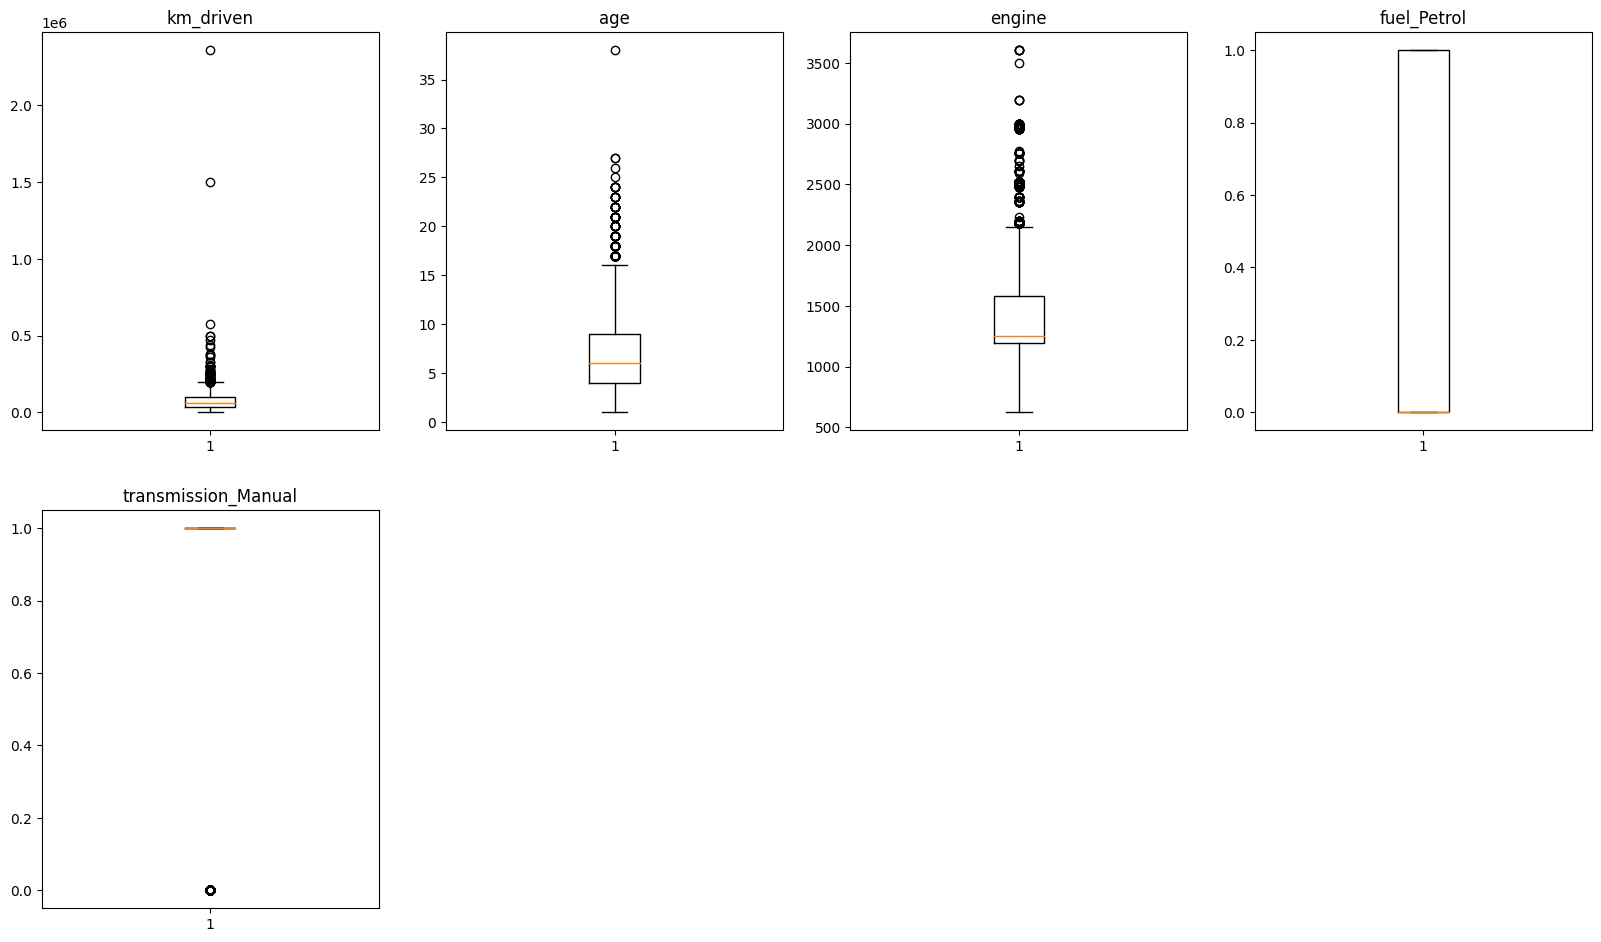

In [971]:
# Create a dictionary of columns.
col_dict = {feature: indx+1 for indx, feature in enumerate(feature_list)}
print(col_dict)

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [972]:
def outlier_count(col, data = X_train):
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    # calculate your inter quatile
    iqr = q75 - q25
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = np.where((data[col] > max_val) | (data[col] < min_val))  # np.where return tuple.

    outlier_count = outlier_count[0] #
    outlier_count = len(outlier_count)

    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [973]:
# Iterate through columns of the training feature matrix
for col in X_train.columns:
    print(col)
    # Apply the function 'outlier_count' to the current column
    outlier_count(col)

km_driven

---------------km_driven---------------

Number of outliers: 102
Percent of data that is outlier: 1.82%
age

---------------age---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%
engine

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%
fuel_Petrol
transmission_Manual

---------------transmission_Manual---------------

Number of outliers: 758
Percent of data that is outlier: 13.49%


 **Before Scalling we preserve mean of  the input feature (will be used later deployment where user won't input  value of a particular feature )**

In [974]:
max_year = df['year'].max()
mean_age = X_train['age'].mean()
mean_km_driven = X_train['km_driven'].mean()
mean_engine_size = X_train['engine'].mean()
max_year,mean_age, mean_km_driven, mean_engine_size

(2020, 7.137924897668625, 70029.87346502936, 1463.855626715462)

In [975]:
X_train.head()

,km_driven,age,engine,fuel_Petrol,transmission_Manual
6853,120000,6,2499.0,0,1
1495,90000,8,2523.0,0,1
7904,92000,8,1248.0,0,1
1281,100000,11,1248.0,0,1
1421,120000,11,1396.0,0,1


### Scaling

__Feature scaling helps improve reach convergence faster__
- using the StandardScaler from sklearn.preprocessing to standardize the numerical features in the training and testing sets.
- Categorical features are typically represented as binary or one-hot encoded vectors. These representations are already in a consistent format that doesn't have varying magnitudes like numerical features.

In [976]:
from sklearn.preprocessing import StandardScaler

# List of continuous numerical features to be standardized
feature_list_continuous = ['km_driven', 'age', 'engine']
# Initialize the StandardScaler
scaler = StandardScaler()
# Standardize the selected numerical features in the training set
X_train[feature_list_continuous] = scaler.fit_transform(X_train[feature_list_continuous])
# Standardize the selected numerical features in the testing set
X_test[feature_list_continuous]  = scaler.transform(X_test[feature_list_continuous])

- Save scaler for future inference 

In [847]:
import pickle5 as pickle

In [848]:
# Save the scaler's mean and scale parameters
scaler_path = "./model/scaler.pkl"
scaler_params = {
    'mean': scaler.mean_,
    'scale': scaler.scale_
}
with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(scaler_params, scaler_file)

In [849]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 5)
Shape of X_test:  (2409, 5)
Shape of y_train:  (5619, 4)
Shape of y_test:  (2409, 4)


In [850]:
#copying train and test dataset 
X_train_set = X_train.copy()
X_test_set =  X_test.copy()

In [851]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train_set.shape, type(X_train))
print("Shape of X_test: ", X_test_set.shape, type(X_test))
print("Shape of y_train: ", y_train.shape, type(y_train))
print("Shape of y_test: ", y_test.shape, type(y_test))

Shape of X_train:  (5619, 5) <class 'pandas.core.frame.DataFrame'>
Shape of X_test:  (2409, 5) <class 'pandas.core.frame.DataFrame'>
Shape of y_train:  (5619, 4) <class 'pandas.core.frame.DataFrame'>
Shape of y_test:  (2409, 4) <class 'pandas.core.frame.DataFrame'>


In [854]:
#add intercept in both training and testing feature
X_train_set['intercept'] = 1
X_test_set['intercept'] = 1

In [855]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train_set.shape, type(X_train))
print("Shape of X_test: ", X_test_set.shape, type(X_test))
print("Shape of y_train: ", y_train.shape, type(y_train))
print("Shape of y_test: ", y_test.shape, type(y_test))

Shape of X_train:  (5619, 6) <class 'pandas.core.frame.DataFrame'>
Shape of X_test:  (2409, 6) <class 'pandas.core.frame.DataFrame'>
Shape of y_train:  (5619, 4) <class 'pandas.core.frame.DataFrame'>
Shape of y_test:  (2409, 4) <class 'pandas.core.frame.DataFrame'>


In [857]:
# Convert pandas DataFrames to NumPy arrays
X_train_np = X_train_set.values
X_test_np = X_test_set.values

# Convert pandas Series to NumPy arrays
y_train_np = y_train.values
y_test_np = y_test.values

In [858]:
type(X_train_np)

numpy.ndarray

In [859]:
y_test_np

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [860]:
y_train_np

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [861]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train_np.shape, type(X_train_np))
print("Shape of X_test: ", X_test_np.shape,type(X_test_np))
print("Shape of y_train: ", y_train_np.shape,type(y_train_np))
print("Shape of y_test: ", y_test_np.shape,type(y_test_np))

Shape of X_train:  (5619, 6) <class 'numpy.ndarray'>
Shape of X_test:  (2409, 6) <class 'numpy.ndarray'>
Shape of y_train:  (5619, 4) <class 'numpy.ndarray'>
Shape of y_test:  (2409, 4) <class 'numpy.ndarray'>


In [862]:
#experiment tracking
import os
import mlflow
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th")
mlflow.set_experiment(experiment_name="st124047-a3")

<Experiment: artifact_location='mlflow-artifacts:/589799493908908443', creation_time=1695815973047, experiment_id='589799493908908443', last_update_time=1695815973047, lifecycle_stage='active', name='st124047-a3', tags={}>

In [863]:
import time

### 6. Modeling

In [864]:
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=5000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def accuracy(self, Y_true, Y_pred):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        # Calculate the number of correct predictions
        num_correct = np.sum(Y_true == Y_pred)
        
        # Calculate the accuracy
        accuracy = num_correct / Y_true.shape[0]
        
        return accuracy
    
    def precision_recall_f1(self, Y_true, Y_pred):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        num_classes = self.k
        precision_scores = []
        recall_scores = []
        f1_scores = []

        for c in range(num_classes):
            # Calculate True Positives, False Positives, True Negatives, and False Negatives for class c
            TP_c = np.sum((Y_true == c) & (Y_pred == c))
            FP_c = np.sum((Y_true != c) & (Y_pred == c))
            TN_c = np.sum((Y_true != c) & (Y_pred != c))
            FN_c = np.sum((Y_true == c) & (Y_pred != c))

            # Calculate precision, recall, and F1-score for class c
            precision_c = TP_c / (TP_c + FP_c) if (TP_c + FP_c) > 0 else 0.0
            recall_c = TP_c / (TP_c + FN_c) if (TP_c + FN_c) > 0 else 0.0
            f1_c = 2 * precision_c * recall_c / (precision_c + recall_c) if (precision_c + recall_c) > 0 else 0.0

            precision_scores.append(precision_c)
            recall_scores.append(recall_c)
            f1_scores.append(f1_c)

        return precision_scores, recall_scores, f1_scores
    
    def macro_precision_recall_f1(self, Y_true, Y_pred):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        num_classes = self.k
        precision_scores, recall_scores, f1_scores = self.precision_recall_f1(Y_true, Y_pred)

        # Calculate macro precision, macro recall, and macro F1-score
        macro_precision = sum(precision_scores) / num_classes
        macro_recall = sum(recall_scores) / num_classes
        macro_f1 = sum(f1_scores) / num_classes

        return macro_precision, macro_recall, macro_f1
    
    def weighted_precision_recall_f1(self, Y_true, Y_pred, class_weights):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        num_classes = self.k
        precision_scores, recall_scores, f1_scores = self.precision_recall_f1(Y_true, Y_pred)

        # Calculate weighted precision, weighted recall, and weighted F1-score
        weighted_precision = sum(p * w for p, w in zip(precision_scores, class_weights))
        weighted_recall = sum(r * w for r, w in zip(recall_scores, class_weights))
        weighted_f1 = sum(f * w for f, w in zip(f1_scores, class_weights))

        return weighted_precision, weighted_recall, weighted_f1

    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

In [911]:
class RidgeLogisticRegression(LogisticRegression):

    def __init__(self, k, n, method, alpha=0.001, max_iter=50000, lambda_=1.0):
        super().__init__(k, n, method, alpha, max_iter)
        self.lambda_ = lambda_

    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = -np.sum(Y * np.log(h)) / m
        error = h - Y

        # Calculate the gradient with the L2 regularization term
        grad = self.softmax_grad(X, error) + 2 * self.lambda_ * self.W

        return loss, grad


In [912]:
X_train_np.shape, y_train_np.shape

((5619, 6), (5619, 4))

In [913]:
# Instantiate RidgeLogisticRegression with L2 regularization
ridge_model = RidgeLogisticRegression(k=4, n=6, method="batch", lambda_=0.1)

# Train the model
ridge_model.fit(X_train_np, y_train_np)


Loss at iteration 0 1.4250615915615197
Loss at iteration 500 1.167717827503774
Loss at iteration 1000 1.166372790493906
Loss at iteration 1500 1.16621602169308
Loss at iteration 2000 1.1661968772571831
Loss at iteration 2500 1.1661945262483076
Loss at iteration 3000 1.1661942373376712
Loss at iteration 3500 1.1661942018310494
Loss at iteration 4000 1.1661941974673016
Loss at iteration 4500 1.1661941969309975
Loss at iteration 5000 1.1661941968650866
Loss at iteration 5500 1.166194196856986
Loss at iteration 6000 1.1661941968559904
Loss at iteration 6500 1.1661941968558682
Loss at iteration 7000 1.166194196855853
Loss at iteration 7500 1.166194196855851
Loss at iteration 8000 1.166194196855851
Loss at iteration 8500 1.166194196855851
Loss at iteration 9000 1.1661941968558505
Loss at iteration 9500 1.166194196855851
Loss at iteration 10000 1.166194196855851
Loss at iteration 10500 1.166194196855851
Loss at iteration 11000 1.166194196855851
Loss at iteration 11500 1.166194196855851
Loss a

In [914]:

# Make predictions on the test data
ridge_Y_test_pred = ridge_model.predict(X_test_np)

# Calculate metrics using custom RidgeLogisticRegression
# ...# Display the predicted class labels
print("Predicted Class Labels:")
print(ridge_Y_test_pred)

Predicted Class Labels:
[0 2 0 ... 0 2 2]


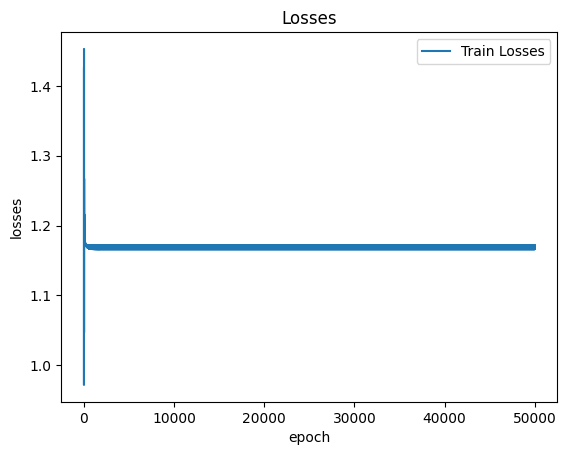

In [915]:
ridge_model.plot()

In [916]:
ridge_Y_test_pred.shape, y_test_np.shape
((2409,), (2409, 4))

((2409,), (2409, 4))

In [917]:
from sklearn.metrics import accuracy_score
#Accuracy Calculation from Sklearn
accuracy_sklrn = accuracy_score(y_test_np.argmax(axis=1), ridge_Y_test_pred)
display(accuracy)

0.5794935657949356

In [918]:
# Accuracy calculation from our scratch function inside LogisticRegression class 
accuracy_scratch = ridge_model.accuracy(y_test_np.argmax(axis=1), ridge_Y_test_pred)
display(accuracy_scratch)

0.5504358655043586

In [919]:
precision, recall, f1 = ridge_model.precision_recall_f1(y_test_np.argmax(axis=1), ridge_Y_test_pred)
# Create a DataFrame
metrics_df = pd.DataFrame({
    'Class': [f'Class {i}' for i in range(len(precision))],
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Print the DataFrame
display(metrics_df)

,Class,Precision,Recall,F1-Score
0,Class 0,0.657016,0.932070,0.770738
1,Class 1,0.555556,0.007974,0.015723
2,Class 2,0.401472,0.875223,0.550448
3,Class 3,0.860215,0.408163,0.553633


In [921]:
# Assuming ridge_model.macro_precision_recall_f1 returns macro metrics
macro_precision, macro_recall, macro_f1 = ridge_model.macro_precision_recall_f1(y_test_np.argmax(axis=1), ridge_Y_test_pred)

# Create a DataFrame for macro metrics
macro_metrics_df = pd.DataFrame({
    'Metric': ['Macro Precision', 'Macro Recall', 'Macro F1-Score'],
    'Value': [macro_precision, macro_recall, macro_f1]
})

# Display the combined DataFrame as a table
display(macro_metrics_df)

,Metric,Value
0,Macro Precision,0.618564
1,Macro Recall,0.555858
2,Macro F1-Score,0.472636


In [922]:
# Assuming ridge_model.weighted_precision_recall_f1 returns weighted metrics
weighted_precision, weighted_recall, weighted_f1 = ridge_model.weighted_precision_recall_f1(y_test_np.argmax(axis=1), ridge_Y_test_pred, [0.2, 0.3, 0.2, 0.3])

# Create a DataFrame for weighted metrics
weighted_metrics_df = pd.DataFrame({
    'Metric': ['Weighted Precision', 'Weighted Recall', 'Weighted F1-Score'],
    'Value': [weighted_precision, weighted_recall, weighted_f1]
})



# Display the combined DataFrame as a table
display(weighted_metrics_df)


,Metric,Value
0,Weighted Precision,0.636429
1,Weighted Recall,0.486300
2,Weighted F1-Score,0.435044
